In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU

Using TensorFlow backend.


In [13]:
a = np.array([[1, 1], [2, 1], [3, 1]])
a_ = lin.pinv(a)
print(a_)
y = np.array([2, 4, 6.4]).reshape(3, 1)
w = np.matmul(a_, y)
print(w)

[[-5.00000000e-01 -3.19189120e-16  5.00000000e-01]
 [ 1.33333333e+00  3.33333333e-01 -6.66666667e-01]]
[[ 2.2       ]
 [-0.26666667]]


In [11]:
#y = wx + b
y = w[0, 0] * 1 + w[1, 0]
print(y)
#np.matmul(w, np.array([1, 1]))x-

1.9333333333333322


In [15]:
x_ = np.array([[-1, 1], [0, 1], [1, 1], [2, 1]])
np.matmul(x_, w)

array([[-2.46666667],
       [-0.26666667],
       [ 1.93333333],
       [ 4.13333333]])

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [20]:
model = Sequential()

model.add(Dense(10, input_dim=2))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))

model.add(Dense(10))
model.add(Activation('sigmoid'))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_9 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
model.fit(X, y, batch_size=4, epochs=3000, verbose=0)
print(model.predict(X))  # 행렬은 4x1이다.  smaple 수 x 클래스수이미르

[[0.00203756]
 [0.9952644 ]
 [0.9947754 ]
 [0.00223662]]


In [23]:
p = model.predict(X)
print((p > 0.5)*1)

[[0]
 [1]
 [1]
 [0]]


In [25]:
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
print(grid.shape)
print(grid)

(2500, 2)
[[0.   0.  ]
 [0.   0.02]
 [0.   0.04]
 ...
 [0.98 0.94]
 [0.98 0.96]
 [0.98 0.98]]


(2500, 2)
<class 'numpy.ndarray'>
(2500, 1)


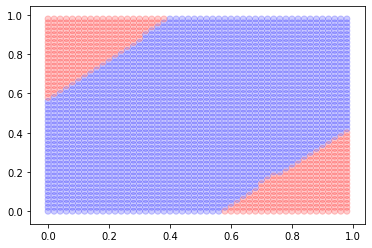

In [24]:
h = model.predict_proba(grid)

print(type(h))
print(h.shape)

colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  
plt.savefig('xor.png')

# 신경망이 깊어져도 성능이 나아지지 않는 이유

* 층이 깊어질수록, 층마다 학습 유무가 차이가 나게 됨
* 목표 상실
* 결과를 얻을 수 없게 됨

In [1]:
#역전파

#단순하게 수치적으로 미분을 계산한다면 모든 가중치에 대해서 개별적으로 미분을 계산해야 한다.
#그러나 역전파 방법을 사용하면 모든 가충치에 대한 미분값을 한번에 계산할 수 있다.

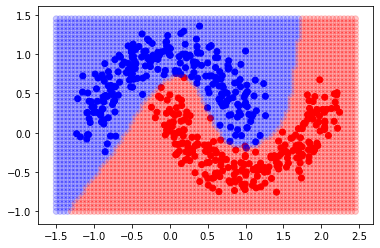

In [15]:
model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01))  
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data))

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

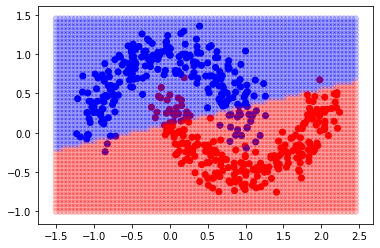

In [16]:
model = Sequential([
    Dense(5, activation='sigmoid',input_dim=2),   
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(5, activation='sigmoid'),
    Dense(1, activation='sigmoid'),
])
model.compile(loss='binary_crossentropy', optimizer=Adam(0.01))  
model.fit(x_data, y_data, batch_size=100, epochs=3000, verbose=0,
          validation_data=(x_data, y_data))

colors = ["red"  if i == 1  else   "blue"    for i  in y_data  ]
plt.scatter(x_data[:,0], x_data[:,1], color = colors, alpha=1.0)
xx, yy = np.mgrid[-1.5:2.5:0.05, -1:1.5:0.05]
grid = np.c_[xx.ravel(), yy.ravel()]
h = model.predict_proba(grid)
colors = ["red"  if i>  0.5  else  "blue"  for i  in h  ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)